In [1]:
import thinfilm as tm
import material as ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

In [32]:
# general material
air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
# material from SemiLab
Acrylic = ml.open_material('Acrylic', 'Sellmeier')
SiN = ml.open_material('SiN', 'Sellmeier')
SiO2 = ml.open_material('SiO2', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')
OC = ml.open_material('OC', 'Sellmeier')
# material from LENS
SiN_LENS = ml.open_material('SiN_LENS', 'Sellmeier')
SiO2_LENS = ml.open_material('SiO2_LENS', 'Sellmeier')
ITO_LENS = ml.open_material('ITO_LENS', 'Sellmeier')
OC_LENS = ml.open_material('OC_LENS', 'Material')
#
SL_dia = tm.Design(
    [air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, 1708, 14.6, 28.3, 26, 27.4, 14.3, None]
)

SL_bri = tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, 1237.6, 11.4, 23.7, 8.4, 1048.4, 33.7, 46.9, 11.5, None]
)

In [ ]:
OC_LENS.

In [30]:
wl = np.linspace(400, 700, 301)
hypo = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

fom = lambda th: sum((hypo(th) - SL_dia.reflectance(wl))**2)

res = differential_evolution(
    fom, [
        (1600, 1800), 
        (4, 20), 
        (20, 80), 
        (20, 26), 
        (20, 80), 
        (4, 12)
    ]
)

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

[1655.75218503   13.68962426   39.29005814   26.           43.17658243
    8.4202751 ]
Optimization terminated successfully.


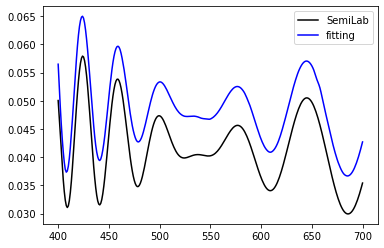

In [27]:
print(res.x)
print(res.message)
plt.plot(wl, SL_dia.reflectance(wl), '-k', label = 'SemiLab')
plt.plot(wl, hypo(res.x), '-b', label = 'fitting')
plt.legend(loc = 'best')
plt.show()

In [ ]:
hypo2 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, OC_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], th[6], th[7], None]
).reflectance(wl)

fom2 = lambda th: sum((hypo2(th) - SL_.reflectance(wl))**2)

res2 = differential_evolution(
    fom, [
        (1600, 1800), 
        (4, 20), 
        (20, 80), 
        (20, 26), 
        (1000, 1500), 
        (20, 26),
        (20, 80), 
        (4, 12)
    ]
)

In [ ]:
plt.plot(wl, SL_bri.reflectance(wl))
plt.plot(wl, )
plt.show()